# 포지션, 나이, WAR, 잔류 여부 포함 기계 학습 도전

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_pi = pd.read_excel('데이터톤 투수 최종 데이터.xlsx')
df_ba = pd.read_excel('데이터톤 야수 최종 데이터.xlsx')

## 1차 시기 : 연도별 성적에 가중치 없이 단순 합산 진행

In [ ]:
# 원본 데이터 보존을 위한 카피
df_pi_m1 = df_pi.copy()

df_ba_m1 = df_ba.copy()

In [ ]:
# 일단 필요한 칼럼만 따오기
df_pi_m1 = df_pi_m1[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]
df_ba_m1 = df_ba_m1[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]

df_ba_m1['종합 WAR'] = df_ba_m1['oWAR'] + df_ba_m1['dWAR']
df_ba_m1 = df_ba_m1.drop(['oWAR', 'dWAR'], axis=1)

In [ ]:
df_pi_m1['group'] = df_pi_m1.groupby('선수명').cumcount() // 4
df_ba_m1['group'] = df_ba_m1.groupby('선수명').cumcount() // 4

df_pi_m1['FA 선언 시점 연령'] = df_pi_m1.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_m1['FA 선언 시점 연령'] = df_ba_m1.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_m1 = df_pi_m1.drop('Age', axis=1)
df_ba_m1 = df_ba_m1.drop('Age', axis=1)

df_pi_m1 = df_pi_m1.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

df_ba_m1 = df_ba_m1.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_m1 = df_pi_m1[df_pi_m1['잔류 여부'].isin(['이적', '잔류'])]
df_ba_m1 = df_ba_m1[df_ba_m1['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요 없는 칼럼 제거
df_pi_m1 = df_pi_m1.drop('group', axis=1)
df_ba_m1 = df_ba_m1.drop('group', axis=1)

In [ ]:
# 테스트 데이터에도 동일한 처리 진행

df_pi_25 = pd.read_excel('2025 KBO 투수 FA.xlsx')
df_ba_25 = pd.read_excel('2025 KBO 야수 FA.xlsx')

df_pi_25 = df_pi_25[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]
df_ba_25 = df_ba_25[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]

df_ba_25['종합 WAR'] = df_ba_25['oWAR'] + df_ba_25['dWAR']
df_ba_25 = df_ba_25.drop(['oWAR', 'dWAR'], axis=1)

In [ ]:
df_pi_25['group'] = df_pi_25.groupby('선수명').cumcount() // 4
df_ba_25['group'] = df_ba_25.groupby('선수명').cumcount() // 4

df_pi_25['FA 선언 시점 연령'] = df_pi_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_25['FA 선언 시점 연령'] = df_ba_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_25 = df_pi_25.drop('Age', axis=1)
df_ba_25 = df_ba_25.drop('Age', axis=1)

df_pi_25 = df_pi_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

df_ba_25 = df_ba_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_25 = df_pi_25[df_pi_25['잔류 여부'].isin(['이적', '잔류'])]
df_ba_25 = df_ba_25[df_ba_25['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요없는 칼럼 정리
df_pi_25 = df_pi_25.drop('group', axis=1)
df_ba_25 = df_ba_25.drop('group', axis=1)

In [ ]:
# 선수명은 계약 결과와 무관하므로 따로 임시 보관
# 투수 선수명 분리
names_pi_1 = df_pi_m1['선수명']
df_pi_m1 = df_pi_m1.drop('선수명', axis=1)

names_pi_25 = df_pi_25['선수명']
df_pi_25 = df_pi_25.drop('선수명', axis=1)

# 야수 선수명 분리
names_ba_1 = df_ba_m1['선수명']
df_ba_m1 = df_ba_m1.drop('선수명', axis=1)

names_ba_25 = df_ba_25['선수명']
df_ba_25 = df_ba_25.drop('선수명', axis=1)

In [ ]:
# 원핫 인코딩으로 포지션과 잔류 여부 인코딩
# 문자형 칼럼인 포지션과 잔류 여부, B/T만 골라 인코딩
# 투수와 타자의 칼럼 종류가 달라 둘을 따로 인코딩
columns_pi = df_pi_m1.select_dtypes(include='object').columns

data_pi = pd.concat([df_pi_m1, df_pi_25])
data_oh_pi = pd.get_dummies(data_pi)

df_pi_m1 = data_oh_pi.iloc[:len(df_pi_m1)]
df_pi_25 = data_oh_pi.iloc[len(df_pi_m1):]


columns_ba = df_ba_m1.select_dtypes(include='object').columns

data_ba = pd.concat([df_ba_m1, df_ba_25])
data_oh_ba = pd.get_dummies(data_ba)

df_ba_m1 = data_oh_ba.iloc[:len(df_ba_m1)]
df_ba_25 = data_oh_ba.iloc[len(df_ba_m1):]

In [ ]:
# 훈련용-검증용 투수 데이터 분할(2013~2023)
from sklearn.model_selection import train_test_split

target_pi_m1 = df_pi_m1[['FA 계약 연수', 'FA 계약 총액']]
target_pi_25 = df_pi_25[['FA 계약 연수', 'FA 계약 총액']]

df_pi_m1 = df_pi_m1.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)
df_pi_25 = df_pi_25.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)

x_pi_train, x_pi_val, y_pi_train, y_pi_val = train_test_split(df_pi_m1, target_pi_m1, test_size=0.2, random_state=0)


# 훈련용-검증용 야수 데이터 분할(2013~2023)

target_ba_m1 = df_ba_m1[['FA 계약 연수', 'FA 계약 총액']]
target_ba_25 = df_ba_25[['FA 계약 연수', 'FA 계약 총액']]

df_ba_m1 = df_ba_m1.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)
df_ba_25 = df_ba_25.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)

x_ba_train, x_ba_val, y_ba_train, y_ba_val = train_test_split(df_ba_m1, target_ba_m1, test_size=0.2, random_state=0)

### 연수, 총액에 모두 회귀 모델 적용

In [ ]:
# 앞서 종속변수인 계약 연수와 계약 금액과는 선형적인 상관관계가 존재함을 확인한 바 있음
# 단순한 회귀모델은 개별 종속변수에 독립적인 회귀분석을 진행하므로 결과가 의도했던 바와 달라질 위험이 큼
# 요소 사이의 관계를 고려할 수 있는 딥러닝 기법 사용
# 투수부터 분석 진행

import tensorflow as tf
from tensorflow.keras import *

# 입력 차원은 칼럼 수, 출력 차원은 종속변수 개수
input_dim = x_pi_train.shape[1]
model = models.Sequential([
    layers.Input(shape=(input_dim, )),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])

model.compile(optimizer='adam', loss='mse')
model.fit(x_pi_train, y_pi_train, epochs=50, batch_size=16, validation_data=(x_pi_val, y_pi_val))
model.evaluate(df_pi_25, target_pi_25)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 570.2820 - val_loss: 553.2685
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 691.6384 - val_loss: 550.6312
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 534.1045 - val_loss: 547.0237
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 518.8970 - val_loss: 541.2911
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 589.1815 - val_loss: 533.0027
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 554.9366 - val_loss: 526.1942
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 557.8250 - val_loss: 520.9771
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 581.5689 - val_loss: 516.1396
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 523.2590 - val_loss: 513.0450
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 497.1701 - val_loss: 510.2839
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 547.7038 - val_loss: 507.4104
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

233.20082092285156

In [ ]:
y_pred_pi_25 = model.predict(df_pi_25)
y_pred_pi_25

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[ 3.013124 ,  7.282212 ],
       [ 4.0113583,  9.82595  ],
       [ 2.820883 ,  9.791252 ],
       [ 4.691529 ,  9.2881565],
       [ 4.895189 , 45.91034  ],
       [ 5.549797 , 12.334317 ],
       [ 3.920474 ,  9.261023 ],
       [ 2.9853787, 12.176852 ],
       [ 3.6606443,  8.74991  ],
       [ 3.302531 , 22.35681  ],
       [ 4.939954 , 42.682228 ]], dtype=float32)

In [ ]:
comparison = pd.DataFrame({
    '선수명' : names_pi_25,
    '예측 연수': y_pred_pi_25[:, 0],
    '예측 총액': y_pred_pi_25[:, 1],
    '실제 연수': target_pi_25['FA 계약 연수'].values,
    '실제 총액': target_pi_25['FA 계약 총액'].values
})

comparison

,선수명,예측 연수,예측 총액,실제 연수,실제 총액
0,구승민,3.013124,7.282212,4.0,21.0
1,김강률,4.011358,9.825950,4.0,14.0
2,김원중,2.820883,9.791252,4.0,54.0
3,노경은,4.691529,9.288157,3.0,25.0
5,엄상백,4.895189,45.910339,4.0,78.0
6,우규민,5.549797,12.334317,2.0,7.0
7,이용찬,3.920474,9.261023,3.0,10.0
8,임기영,2.985379,12.176852,3.0,15.0
9,임정호,3.660644,8.749910,3.0,12.0
10,장현식,3.302531,22.356810,4.0,52.0


In [ ]:
from sklearn.metrics import r2_score

r2_y1 = r2_score(target_pi_25.iloc[:, 0], y_pred_pi_25[:, 0])  # 계약 연수
r2_y2 = r2_score(target_pi_25.iloc[:, 1], y_pred_pi_25[:, 1])  # 계약 총액

print(f"연수 R²: {r2_y1:.4f}")
print(f"총액 R²: {r2_y2:.4f}")

# 투수의 경우 던지는 손을 데이터에 넣었더니 오히려 r^2이 크게 감소해 평균 값으로 맞히는 것만도 못하게 됐음
# 가중치 반영한 값으로 다시 시도한 후 우사와 우언을 묶어 최종 진행 시도
# 그래도 안 된다면 던지는 손을 아예 빼고 원래 모델로 재도전하기로

연수 R²: -3.5020
총액 R²: 0.2411


In [ ]:
from sklearn.metrics import mean_squared_error

mse_pi_y1 = mean_squared_error(target_pi_25.iloc[:, 0], y_pred_pi_25[:, 0])
mse_pi_y2 = mean_squared_error(target_pi_25.iloc[:, 1], y_pred_pi_25[:, 1])

print('mse_연도 :', mse_pi_y1, 'mse_총액 :', mse_pi_y2)

mse_연도 : 1.9347250193460725 mse_총액 : 464.4668923416839


## 2차 시기 : 연도별로 성적에 가중치 적용, 연도는 분류 모델로 적용

In [ ]:
df_pi_m2 = df_pi.copy()
df_ba_m2 = df_ba.copy()

In [ ]:
df_pi_m2 = df_pi_m2[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]
df_ba_m2 = df_ba_m2[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]

df_ba_m2['종합 WAR'] = df_ba_m2['oWAR'] + df_ba_m2['dWAR']
df_ba_m2.drop(['oWAR', 'dWAR'], axis=1, inplace=True)

In [ ]:
# 연도별 성적에 가중치 매기기
df_pi_m2['weight'] = ((df_pi_m2.index % 4) + 1) / 10 * 4
df_ba_m2['weight'] = ((df_ba_m2.index % 4) + 1) / 10 * 4

# 왜 위와 같은 산식을 썼는지?
# 선수의 데이터가 4행 단위로 묶여 있어 인덱스를 4로 나눈 나머지에 1을 더하면 1, 2, 3, 4가 나옴
# 이것을 10으로 나누면 가중치 0.1, 0.2, 0.3, 0.4가 적용됨
# 그러나 1차 시기에서 가중치의 합이 1:1:1:1로 적용됐으므로 동일한 스케일로 조정하기 위해 가중치 합 4가 나오도록 4를 곱함

In [ ]:
# 군 복무한 선수들의 가중치를 이월해서 적용
def apply_weight_with_service_adjustment(df):
    def redistribute_weights(group):
        weights = group['weight'].tolist()
        teams = group['구단명'].tolist()
        new_weights = [0] * len(weights)
        carry_over = 0

        for i in range(len(weights)):
            if teams[i] == '군 복무':
                carry_over += weights[i]  # 군 복무면 이월, 실전 시즌에 누적 가중치 반영
            else:
                new_weights[i] = weights[i] + carry_over
                carry_over = 0            # 반영 후 초기화

        group['new_weight'] = new_weights
        return group

    return df.groupby('선수명', group_keys=False).apply(redistribute_weights)


# 선수명 기준으로 그룹화 후 적용
df_pi_m2 = apply_weight_with_service_adjustment(df_pi_m2)
df_ba_m2 = apply_weight_with_service_adjustment(df_ba_m2)

In [ ]:
df_pi_m2['가중치 적용 종합 WAR'] = df_pi_m2['종합 WAR'] * df_pi_m2['new_weight']
df_ba_m2['가중치 적용 종합 WAR'] = df_ba_m2['종합 WAR'] * df_ba_m2['new_weight']

In [ ]:
# 4년 단위로 쓰인 데이터를 선수별로 1줄로 정리
df_pi_m2['group'] = df_pi_m2.groupby('선수명').cumcount() // 4
df_ba_m2['group'] = df_ba_m2.groupby('선수명').cumcount() // 4

df_pi_m2['FA 선언 시점 연령'] = df_pi_m2.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_m2['FA 선언 시점 연령'] = df_ba_m2.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_m2 = df_pi_m2.drop('Age', axis=1)
df_ba_m2 = df_ba_m2.drop('Age', axis=1)

# 성적은 누적합, 기타 값은 최빈값으로 고정
df_pi_m2 = df_pi_m2.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '가중치 적용 종합 WAR' : 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

# 야수도 같은 방식으로 진행
df_ba_m2 = df_ba_m2.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '가중치 적용 종합 WAR' : 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_m2 = df_pi_m2[df_pi_m2['잔류 여부'].isin(['이적', '잔류'])]
df_ba_m2 = df_ba_m2[df_ba_m2['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요 없는 칼럼 제거
df_pi_m2 = df_pi_m2[['선수명', '포지션', 'Throw', 'FA 선언 시점 연령', '가중치 적용 종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]
df_ba_m2 = df_ba_m2[['선수명', '포지션', 'Throw', 'Bat', 'FA 선언 시점 연령', '가중치 적용 종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]

df_pi_m2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 69
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   선수명            63 non-null     object 
 1   포지션            63 non-null     object 
 2   Throw          63 non-null     object 
 3   FA 선언 시점 연령    63 non-null     int64  
 4   가중치 적용 종합 WAR  63 non-null     float64
 5   잔류 여부          63 non-null     object 
 6   FA 계약 연수       63 non-null     float64
 7   FA 계약 총액       63 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ KB


In [ ]:
# 테스트 데이터에도 동일한 처리 진행

df_pi_25 = pd.read_excel('2025 KBO 투수 FA.xlsx')
df_ba_25 = pd.read_excel('2025 KBO 야수 FA.xlsx')

df_pi_25 = df_pi_25[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]
df_ba_25 = df_ba_25[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]

df_ba_25['종합 WAR'] = df_ba_25['oWAR'] + df_ba_25['dWAR']
df_ba_25 = df_ba_25.drop(['oWAR', 'dWAR'], axis=1)

In [ ]:
# 연도별 성적에 가중치 매기기
df_pi_25['weight'] = ((df_pi_25.index % 4) + 1) / 10 * 4
df_ba_25['weight'] = ((df_ba_25.index % 4) + 1) / 10 * 4

In [ ]:
# 군 복무한 선수들의 가중치를 이월해서 적용
def apply_weight_with_service_adjustment(df):
    def redistribute_weights(group):
        weights = group['weight'].tolist()
        teams = group['구단명'].tolist()
        new_weights = [0] * len(weights)
        carry_over = 0

        for i in range(len(weights)):
            if teams[i] == '군 복무':
                carry_over += weights[i]  # 군 복무면 이월, 실전 시즌에 누적 가중치 반영
            else:
                new_weights[i] = weights[i] + carry_over
                carry_over = 0            # 반영 후 초기화

        group['new_weight'] = new_weights
        return group

    return df.groupby('선수명', group_keys=False).apply(redistribute_weights)


# 선수명 기준으로 그룹화 후 적용
df_pi_25 = apply_weight_with_service_adjustment(df_pi_25)
df_ba_25 = apply_weight_with_service_adjustment(df_ba_25)

In [ ]:
df_pi_25['가중치 적용 종합 WAR'] = df_pi_25['종합 WAR'] * df_pi_25['new_weight']
df_ba_25['가중치 적용 종합 WAR'] = df_ba_25['종합 WAR'] * df_ba_25['new_weight']

In [ ]:
df_pi_25['group'] = df_pi_25.groupby('선수명').cumcount() // 4
df_ba_25['group'] = df_ba_25.groupby('선수명').cumcount() // 4

df_pi_25['FA 선언 시점 연령'] = df_pi_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_25['FA 선언 시점 연령'] = df_ba_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_25 = df_pi_25.drop('Age', axis=1)
df_ba_25 = df_ba_25.drop('Age', axis=1)

df_pi_25 = df_pi_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '가중치 적용 종합 WAR' : 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

df_ba_25 = df_ba_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '가중치 적용 종합 WAR' : 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_25 = df_pi_25[df_pi_25['잔류 여부'].isin(['이적', '잔류'])]
df_ba_25 = df_ba_25[df_ba_25['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요 없는 칼럼 제거
df_pi_25 = df_pi_25[['선수명', '포지션', 'Throw', 'FA 선언 시점 연령', '가중치 적용 종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]
df_ba_25 = df_ba_25[['선수명', '포지션', 'Throw', 'Bat', 'FA 선언 시점 연령', '가중치 적용 종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]

In [ ]:
# 선수명은 계약 결과와 무관하므로 따로 임시 보관
names_pi_1 = df_pi_m2['선수명']
names_pi_25 = df_pi_25['선수명']

df_pi_m2 = df_pi_m2.drop('선수명', axis=1)
df_pi_25 = df_pi_25.drop('선수명', axis=1)

names_ba_1 = df_ba_m2['선수명']
names_ba_25 = df_ba_25['선수명']

df_ba_m2 = df_ba_m2.drop('선수명', axis=1)
df_ba_25 = df_ba_25.drop('선수명', axis=1)

### 원핫 인코딩으로 문자형인 포지션과 잔류 여부, 던지는 손과 치는 손 인코딩

In [ ]:
# 원핫 인코딩으로 포지션과 잔류 여부 인코딩
# 문자형 칼럼인 포지션과 잔류 여부만 골라 인코딩
columns_pi = df_pi_m2.select_dtypes(include='object').columns

data_pi = pd.concat([df_pi_m2, df_pi_25])
data_pi_oh = pd.get_dummies(data_pi)

df_pi_m2 = data_pi_oh.iloc[:len(df_pi_m2)]
df_pi_25 = data_pi_oh.iloc[len(df_pi_m2):]

columns_ba = df_ba_m2.select_dtypes(include='object').columns

data_ba = pd.concat([df_ba_m2, df_ba_25])
data_ba_oh = pd.get_dummies(data_ba)

df_ba_m2 = data_ba_oh.iloc[:len(df_ba_m2)]
df_ba_25 = data_ba_oh.iloc[len(df_ba_m2):]


In [ ]:
# 훈련용-검증용 투수 데이터 분할(2013~2023)
from sklearn.model_selection import train_test_split

target_pi_m2 = df_pi_m2[['FA 계약 연수', 'FA 계약 총액']]
target_pi_25 = df_pi_25[['FA 계약 연수', 'FA 계약 총액']]

df_pi_m2 = df_pi_m2.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)
df_pi_25 = df_pi_25.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)

x_pi_train, x_pi_val, y_pi_train, y_pi_val = train_test_split(df_pi_m2, target_pi_m2, test_size=0.2, random_state=0)


# 훈련용-검증용 야수 데이터 분할(2013~2023)

target_ba_m2 = df_ba_m2[['FA 계약 연수', 'FA 계약 총액']]
target_ba_25 = df_ba_25[['FA 계약 연수', 'FA 계약 총액']]

df_ba_m2 = df_ba_m2.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)
df_ba_25 = df_ba_25.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)

x_ba_train, x_ba_val, y_ba_train, y_ba_val = train_test_split(df_ba_m2, target_ba_m2, test_size=0.2, random_state=0)

#### 연수와 총액 모두 회귀 모델로 예측

In [ ]:
# 앞서 종속변수인 계약 연수와 계약 금액과는 선형적인 상관관계가 존재함을 확인한 바 있음
# 단순한 회귀모델은 개별 종속변수에 독립적인 회귀분석을 진행하므로 결과가 의도했던 바와 달라질 위험이 큼
# 요소 사이의 관계를 고려할 수 있는 딥러닝 기법 사용

import tensorflow as tf
from tensorflow.keras import *

# 입력 차원은 칼럼 수, 출력 차원은 종속변수 개수
input_dim = x_pi_train.shape[1]
model = models.Sequential([
    layers.Input(shape=(input_dim, )),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])

model.compile(optimizer='adam', loss='mse')
model.fit(x_pi_train, y_pi_train, epochs=50, batch_size=16, validation_data=(x_pi_val, y_pi_val))
model.evaluate(df_pi_25, target_pi_25)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 626.6187 - val_loss: 629.8824
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 686.1174 - val_loss: 604.1669
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 636.4147 - val_loss: 585.6865
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 514.3286 - val_loss: 569.1599
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 599.0633 - val_loss: 554.4138
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 500.4032 - val_loss: 544.6940
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 644.6370 - val_loss: 536.0764
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 590.7675 - val_loss: 525.9258
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 447.5564 - val_loss: 514.7910
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 514.0616 - val_loss: 504.6916
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 576.8381 - val_loss: 495.8135
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2

309.8920593261719

In [ ]:
y_pred_pi_25 = model.predict(df_pi_25)

comparison2 = pd.DataFrame({
    '선수명' : names_pi_25,
    '예측 연수': y_pred_pi_25[:, 0],
    '예측 총액': y_pred_pi_25[:, 1],
    '실제 연수': target_pi_25['FA 계약 연수'].values,
    '실제 총액': target_pi_25['FA 계약 총액'].values
})

comparison2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


,선수명,예측 연수,예측 총액,실제 연수,실제 총액
0,구승민,2.241859,5.053569,4.0,21.0
1,김강률,2.296287,2.842238,4.0,14.0
2,김원중,0.633165,7.102501,4.0,54.0
3,노경은,0.727886,7.313195,3.0,25.0
5,엄상백,2.712088,44.167988,4.0,78.0
6,우규민,2.896301,3.989007,2.0,7.0
7,이용찬,3.019603,6.977226,3.0,10.0
8,임기영,1.051151,3.456315,3.0,15.0
9,임정호,2.814015,6.828937,3.0,12.0
10,장현식,2.324126,12.615288,4.0,52.0


In [ ]:
from sklearn.metrics import r2_score

r2_y1 = r2_score(target_pi_25.iloc[:, 0], y_pred_pi_25[:, 0])  # 계약 연수
r2_y2 = r2_score(target_pi_25.iloc[:, 1], y_pred_pi_25[:, 1])  # 계약 총액

print(f"연수 R²: {r2_y1:.4f}")
print(f"총액 R²: {r2_y2:.4f}")

# ;;

연수 R²: -5.8869
총액 R²: -0.0078


In [ ]:
from sklearn.metrics import mean_squared_error

mse_pi_y1 = mean_squared_error(target_pi_25.iloc[:, 0], y_pred_pi_25[:, 0])
mse_pi_y2 = mean_squared_error(target_pi_25.iloc[:, 1], y_pred_pi_25[:, 1])

print('mse_연도 :', mse_pi_y1, 'mse_총액 :', mse_pi_y2)

# 마지막으로 연수에는 분류를 적용한 모델까지 한 번 돌려보기로

mse_연도 : 2.9596774902275076 mse_총액 : 616.8244236832389


주목 포인트

- FA 계약 연수에 분류 모델을 적용해 다시 시도
- 연수로 해도 결과가 불량하면 투/타 데이터 삽입에서 문제가 생겼다고 봐야
- 정규분포와 차이가 큰 총액 분포로 인해 회귀모델을 쓸 총액에는 RobustScaler 적용

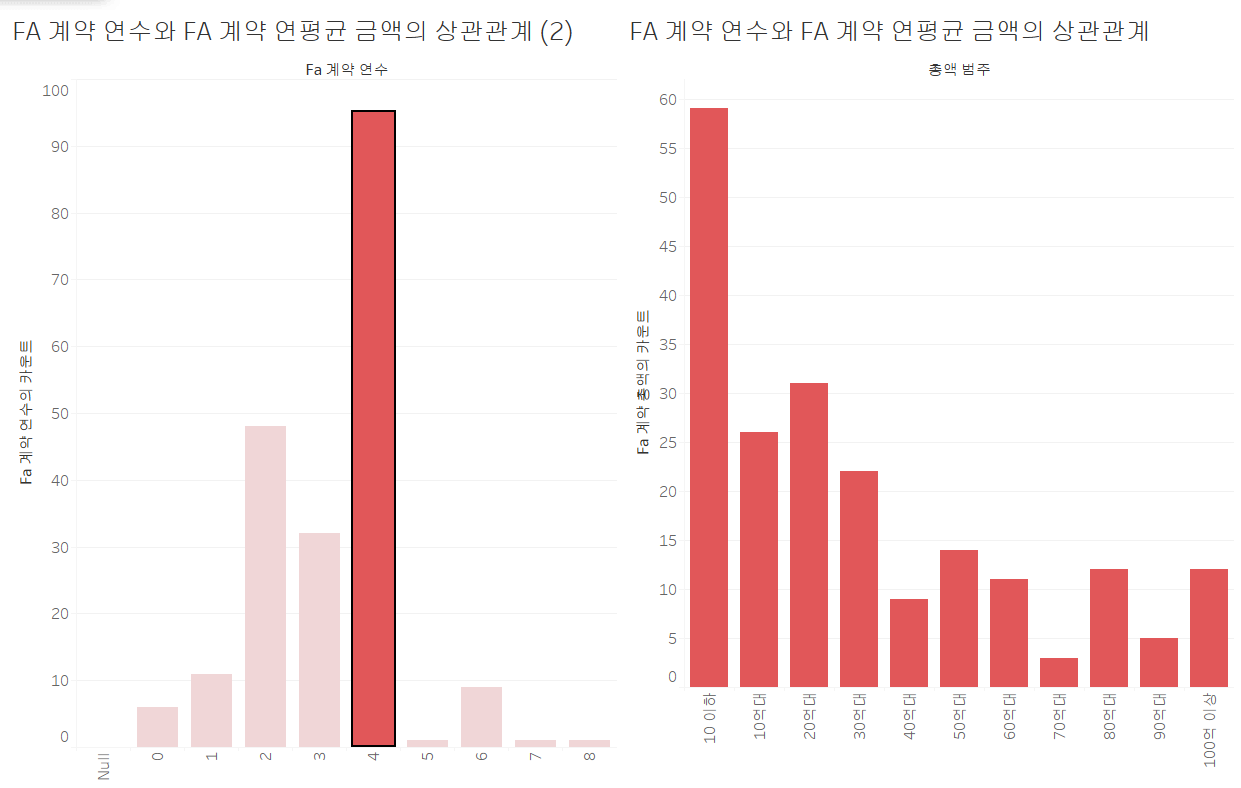

#### 연수는 분류 모델로, 총액은 회귀 모델로 예측

In [ ]:
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import random
import numpy as np
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1. 데이터 결합
data = pd.concat([df_pi_m2, df_pi_25], ignore_index=True)

# 2. 원핫 인코딩 (포지션, 잔류 여부)
cat_cols = ['포지션', 'Throw', '잔류 여부']
data_oh = pd.get_dummies(data[cat_cols])

# 3. 입력(X), 출력(Y) 정의
X_all = pd.concat([data_oh, data[['FA 선언 시점 연령', '가중치 적용 종합 WAR']]], axis=1)
y_year_all = data['FA 계약 연수'] - 1  # to_categorical을 위한 0 기반 인덱스
y_money_all = data['FA 계약 총액']

# 4. 훈련/테스트 분할
X_train = X_all.iloc[:len(df_pi_m2)]
X_test = X_all.iloc[len(df_pi_m2):]
y_year_train = y_year_all.iloc[:len(df_pi_m2)]
y_year_test = y_year_all.iloc[len(df_pi_m2):]
y_money_train = y_money_all.iloc[:len(df_pi_m2)]
y_money_test = y_money_all.iloc[len(df_pi_m2):]

# 5. 연수 → 원핫 인코딩
from tensorflow.keras.utils import to_categorical

y_year_train_cat = to_categorical(y_year_train)
y_year_test_cat = to_categorical(y_year_test)

# 6. 총액 → RobustScaler
scaler = RobustScaler()
y_money_train_scaled = scaler.fit_transform(y_money_train.values.reshape(-1, 1))
y_money_test_scaled = scaler.transform(y_money_test.values.reshape(-1, 1))

# 7. 훈련/검증 분할
X_tr, X_val, y_year_tr, y_year_val, y_money_tr, y_money_val = train_test_split(
    X_train, y_year_train_cat, y_money_train_scaled, test_size=0.2, random_state=0)

# 8. 모델 구성
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(X_tr.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='leaky_relu')(x)
output_year = Dense(4, activation='softmax', name='year_output')(x)
output_money = Dense(1, activation='linear', name='money_output')(x)

output_year = Dense(4, activation='softmax', name='year_output')(x)
output_money = Dense(1, activation='linear', name='money_output')(x)

model = Model(inputs=input_layer, outputs=[output_year, output_money])
model.compile(optimizer=Adam(0.01),
              loss={'year_output': 'categorical_crossentropy', 'money_output': 'mse'},
              metrics={'year_output': 'accuracy', 'money_output': 'mse'})

# 9. 학습
model.fit(X_tr,
          {'year_output': y_year_tr, 'money_output': y_money_tr},
          validation_data=(X_val, {'year_output': y_year_val, 'money_output': y_money_val}),
          epochs=100, batch_size=16, verbose=1)

# 10. 예측
y_pred_year_prob, y_pred_money_scaled = model.predict(X_test)
y_pred_year_cls = y_pred_year_prob.argmax(axis=1) + 1
y_pred_money = scaler.inverse_transform(y_pred_money_scaled)

# 11. 실제 값 복원
y_true_year_cls = y_year_test.values + 1
y_true_money = scaler.inverse_transform(y_money_test_scaled)

# 12. 결과 출력
result_df = pd.DataFrame({
    '선수명' : names_pi_25,
    '예상 연수': y_pred_year_cls,
    '예상 총액': y_pred_money.flatten(),
    '실제 연수': y_true_year_cls,
    '실제 총액': y_true_money.flatten()
})

result_df

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - loss: 31.0563 - money_output_loss: 23.8910 - money_output_mse: 24.9879 - year_output_accuracy: 0.2665 - year_output_loss: 5.6117 - val_loss: 26.2729 - val_money_output_loss: 22.2263 - val_money_output_mse: 22.2263 - val_year_output_accuracy: 0.0769 - val_year_output_loss: 4.0466
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 17.6523 - money_output_loss: 13.4792 - money_output_mse: 14.5108 - year_output_accuracy: 0.0389 - year_output_loss: 2.9704 - val_loss: 5.8045 - val_money_output_loss: 4.5642 - val_money_output_mse: 4.5642 - val_year_output_accuracy: 0.4615 - val_year_output_loss: 1.2402
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.5703 - money_output_loss: 7.3609 - money_output_mse: 7.7212 - year_output_accuracy: 0.2894 - year_output_loss: 1.8764 - val_loss: 4.3601 - val_money_output_loss: 3.2201 - val_money_output_mse: 3.2201 - val_year_output_accuracy: 0.4615 - val_year_output_loss: 1.1400
Epoch 4/100


,선수명,예상 연수,예상 총액,실제 연수,실제 총액
0,구승민,2,18.655174,4.0,21.0
1,김강률,4,23.800846,4.0,14.0
2,김원중,4,46.298309,4.0,54.0
3,노경은,4,42.415722,3.0,25.0
5,엄상백,4,85.870277,4.0,78.0
6,우규민,2,7.563592,2.0,7.0
7,이용찬,2,18.713690,3.0,10.0
8,임기영,4,39.830193,3.0,15.0
9,임정호,2,13.150175,3.0,12.0
10,장현식,4,48.610432,4.0,52.0


In [ ]:
from sklearn.metrics import *

ac_pi = accuracy_score(y_true_year_cls, y_pred_year_cls)
fs_pi = f1_score(y_true_year_cls, y_pred_year_cls, average='weighted')
r2_pi = r2_score(y_true_money, y_pred_money)
rmse_pi = mean_squared_error(y_true_money, y_pred_money) ** 0.5

print(f"연수 예측 정확도 : {ac_pi :.4f}")
print(f"연수 예측 f1-score: {fs_pi :.4f}")
print(f"총액 예측 R²: {r2_pi :.4f}")
print(f"총액 예측 RMSE: {rmse_pi :,.0f}억 원")

# 랜덤성을 배제한 케라스 모델의 평균적인 예측치는 f1-score가 0.45~0.55 수준
# 하지만 랜덤을 배제해도 R^2 수치는 0.8 근처로 매우 높아 신뢰성이 있음
# 결론적으로 케라스 모델은 총액은 주어진 변수들을 가지고 충분히 근접하게 예측할 수 있으나 연도까지 예상하기는 어렵다

연수 예측 정확도 : 0.5455
연수 예측 f1-score: 0.4559
총액 예측 R²: 0.8108
총액 예측 RMSE: 11억 원


In [ ]:
# 같은 방법으로 야수도 진행
# 1. 데이터 결합
data_ba = pd.concat([df_ba_m2, df_ba_25], ignore_index=True)

# 2. 원핫 인코딩 (포지션, 잔류 여부)
cat_cols_ba = ['포지션', 'Throw', 'Bat', '잔류 여부']
data_oh_ba = pd.get_dummies(data_ba[cat_cols_ba])

# 3. 입력(X), 출력(Y) 정의
X_ba_all = pd.concat([data_oh_ba, data_ba[['FA 선언 시점 연령', '가중치 적용 종합 WAR']]], axis=1)
y_year_ba_all = data_ba['FA 계약 연수'] - 1  # to_categorical을 위한 0 기반 인덱스
y_money_ba_all = data_ba['FA 계약 총액']

# 4. 훈련/테스트 분할
X_ba_train = X_ba_all.iloc[:len(df_ba_m2)]
X_ba_test = X_ba_all.iloc[len(df_ba_m2):]
y_year_ba_train = y_year_ba_all.iloc[:len(df_ba_m2)]
y_year_ba_test = y_year_ba_all.iloc[len(df_ba_m2):]
y_money_ba_train = y_money_ba_all.iloc[:len(df_ba_m2)]
y_money_ba_test = y_money_ba_all.iloc[len(df_ba_m2):]

# 5. 연수 → 원핫 인코딩
y_year_ba_train_cat = to_categorical(y_year_ba_train)
y_year_ba_test_cat = to_categorical(y_year_ba_test)

# 6. 총액 → RobustScaler
scaler = RobustScaler()
y_money_ba_train_scaled = scaler.fit_transform(y_money_ba_train.values.reshape(-1, 1))
y_money_ba_test_scaled = scaler.transform(y_money_ba_test.values.reshape(-1, 1))

# 7. 훈련/검증 분할
X_ba_tr, X_ba_val, y_year_ba_tr, y_year_ba_val, y_money_ba_tr, y_money_ba_val = train_test_split(
    X_ba_train, y_year_ba_train_cat, y_money_ba_train_scaled, test_size=0.2, random_state=0)

# 8. 모델 구성
input_ba_layer = Input(shape=(X_ba_tr.shape[1],))
x = Dense(64, activation='relu')(input_ba_layer)
x = Dense(32, activation='leaky_relu')(x)
output_ba_year = Dense(8, activation='softmax', name='year_output')(x)
output_ba_money = Dense(1, activation='linear', name='money_output')(x)

model_ba = Model(inputs=input_ba_layer, outputs=[output_ba_year, output_ba_money])
model_ba.compile(optimizer=Adam(0.01),
              loss={'year_output': 'categorical_crossentropy', 'money_output': 'mse'},
              metrics={'year_output': 'accuracy', 'money_output': 'mse'})

# 9. 학습
model_ba.fit(X_ba_tr,
          {'year_output': y_year_ba_tr, 'money_output': y_money_ba_tr},
          validation_data=(X_ba_val, {'year_output': y_year_ba_val, 'money_output': y_money_ba_val}),
          epochs=100, batch_size=16, verbose=1)

# 10. 예측
y_pred_year_ba_prob, y_pred_money_ba_scaled = model_ba.predict(X_ba_test)
y_pred_year_ba_cls = y_pred_year_ba_prob.argmax(axis=1) + 1
y_pred_ba_money = scaler.inverse_transform(y_pred_money_ba_scaled)

# 11. 실제 값 복원
y_true_year_ba_cls = y_year_ba_test.values + 1
y_true_ba_money = scaler.inverse_transform(y_money_ba_test_scaled)

# 12. 결과 출력
result_df_ba = pd.DataFrame({
    '선수명' : names_ba_25,
    '예상 연수': y_pred_year_ba_cls,
    '예상 총액': y_pred_ba_money.flatten(),
    '실제 연수': y_true_year_ba_cls,
    '실제 총액': y_true_ba_money.flatten()
})

result_df_ba

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - loss: 11.8064 - money_output_loss: 9.6429 - money_output_mse: 9.7012 - year_output_accuracy: 0.2871 - year_output_loss: 2.0989 - val_loss: 2.9036 - val_money_output_loss: 0.8677 - val_money_output_mse: 0.8469 - val_year_output_accuracy: 0.2222 - val_year_output_loss: 2.0590
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7153 - money_output_loss: 1.8134 - money_output_mse: 1.8068 - year_output_accuracy: 0.3626 - year_output_loss: 1.9044 - val_loss: 2.3414 - val_money_output_loss: 0.8233 - val_money_output_mse: 0.7589 - val_year_output_accuracy: 0.4815 - val_year_output_loss: 1.6206
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.2143 - money_output_loss: 0.6443 - money_output_mse: 0.6375 - year_output_accuracy: 0.4660 - year_output_loss: 1.5777 - val_loss: 2.3852 - val_money_output_loss: 0.8379 - val_money_output_mse: 0.8225 - val_year_output_accuracy: 0.4815 - val_year_output_loss: 1.6129
Epoch 4/100
7/7 ━━━━

,선수명,예상 연수,예상 총액,실제 연수,실제 총액
0,김성욱,2,9.921492,3.0,12.0
1,김헌곤,2,8.853170,2.0,6.0
2,류지혁,2,23.665062,4.0,26.0
3,서건창,2,17.290318,2.0,5.0
4,심우준,4,32.190704,4.0,50.0
5,최정,6,94.680412,4.0,110.0
6,하주석,1,13.551216,1.0,1.1
7,허경민,3,44.777237,4.0,40.0


In [ ]:
from sklearn.metrics import *

ac_ba = accuracy_score(y_true_year_ba_cls, y_pred_year_ba_cls)
fs_ba = f1_score(y_true_year_ba_cls, y_pred_year_ba_cls, average='weighted')
r2_ba = r2_score(y_true_ba_money, y_pred_ba_money)
rmse_ba = mean_squared_error(y_true_ba_money, y_pred_ba_money) ** 0.5

print(f"연수 예측 accuracy : {ac_ba:.4f}")
print(f"연수 예측 f1-score: {fs_ba:.4f}")
print(f"총액 예측 R²: {r2_ba:.4f}")
print(f"총액 예측 RMSE: {rmse_ba:,.0f}억 원")

# 맞히기 힘든 연수에서도 절반의 기준점을 넘기고 총액에선 아주 우수한 예측력을 보임
# relu 64, leaky_relu 32, batch_size 8, epoch 10에서 평균적으로 가장 우수한 예측력이 발휘(adam 모델)

연수 예측 accuracy : 0.5000
연수 예측 f1-score: 0.4917
총액 예측 R²: 0.9030
총액 예측 RMSE: 11억 원


#### rmsprop 시도

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1. 데이터 결합
data = pd.concat([df_pi_m2, df_pi_25], ignore_index=True)

# 2. 원핫 인코딩 (포지션, 잔류 여부)
cat_cols = ['포지션', 'Throw', '잔류 여부']
data_oh = pd.get_dummies(data[cat_cols])

# 3. 입력(X), 출력(Y) 정의
X_all = pd.concat([data_oh, data[['FA 선언 시점 연령', '가중치 적용 종합 WAR']]], axis=1)
y_year_all = data['FA 계약 연수'] - 1  # to_categorical을 위한 0 기반 인덱스
y_money_all = data['FA 계약 총액']

# 4. 훈련/테스트 분할
X_train = X_all.iloc[:len(df_pi_m2)]
X_test = X_all.iloc[len(df_pi_m2):]
y_year_train = y_year_all.iloc[:len(df_pi_m2)]
y_year_test = y_year_all.iloc[len(df_pi_m2):]
y_money_train = y_money_all.iloc[:len(df_pi_m2)]
y_money_test = y_money_all.iloc[len(df_pi_m2):]

# 5. 연수 → 원핫 인코딩
from tensorflow.keras.utils import to_categorical

y_year_train_cat = to_categorical(y_year_train)
y_year_test_cat = to_categorical(y_year_test)

# 6. 총액 → RobustScaler
scaler = RobustScaler()
y_money_train_scaled = scaler.fit_transform(y_money_train.values.reshape(-1, 1))
y_money_test_scaled = scaler.transform(y_money_test.values.reshape(-1, 1))

# 7. 훈련/검증 분할
X_tr, X_val, y_year_tr, y_year_val, y_money_tr, y_money_val = train_test_split(
    X_train, y_year_train_cat, y_money_train_scaled, test_size=0.2, random_state=0)

# 8. 모델 구성
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop

input_layer = Input(shape=(X_tr.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='leaky_relu')(x)
output_year = Dense(4, activation='softmax', name='year_output')(x)
output_money = Dense(1, activation='linear', name='money_output')(x)

output_year = Dense(4, activation='softmax', name='year_output')(x)
output_money = Dense(1, activation='linear', name='money_output')(x)

model = Model(inputs=input_layer, outputs=[output_year, output_money])
model.compile(optimizer=RMSprop(0.001),
              loss={'year_output': 'categorical_crossentropy', 'money_output': 'mse'},
              metrics={'year_output': 'accuracy', 'money_output': 'mse'})

# 9. 학습
model.fit(X_tr,
          {'year_output': y_year_tr, 'money_output': y_money_tr},
          validation_data=(X_val, {'year_output': y_year_val, 'money_output': y_money_val}),
          epochs=100, batch_size=8, verbose=1)

# 10. 예측
y_pred_year_prob, y_pred_money_scaled = model.predict(X_test)
y_pred_year_cls = y_pred_year_prob.argmax(axis=1) + 1
y_pred_money = scaler.inverse_transform(y_pred_money_scaled)

# 11. 실제 값 복원
y_true_year_cls = y_year_test.values + 1
y_true_money = scaler.inverse_transform(y_money_test_scaled)

# 12. 결과 출력
result_df_rmsp = pd.DataFrame({
    '선수명' : names_pi_25,
    '예상 연수': y_pred_year_cls,
    '예상 총액': y_pred_money.flatten(),
    '실제 연수': y_true_year_cls,
    '실제 총액': y_true_money.flatten()
})

result_df_rmsp

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 2.9208 - money_output_loss: 1.0049 - money_output_mse: 1.0159 - year_output_accuracy: 0.3783 - year_output_loss: 1.9465 - val_loss: 1.6775 - val_money_output_loss: 0.5955 - val_money_output_mse: 0.7010 - val_year_output_accuracy: 0.6923 - val_year_output_loss: 0.9396
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7795 - money_output_loss: 0.6139 - money_output_mse: 0.6220 - year_output_accuracy: 0.5571 - year_output_loss: 1.1971 - val_loss: 1.6383 - val_money_output_loss: 0.5012 - val_money_output_mse: 0.5948 - val_year_output_accuracy: 0.7692 - val_year_output_loss: 1.0231
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6521 - money_output_loss: 0.5083 - money_output_mse: 0.5163 - year_output_accuracy: 0.5692 - year_output_loss: 1.1710 - val_loss: 1.5500 - val_money_output_loss: 0.4340 - val_money_output_mse: 0.5181 - val_year_output_accuracy: 0.7692 - val_year_output_loss: 1.0183
Epoch 4/100
7/7 ━━━━━━

,선수명,예상 연수,예상 총액,실제 연수,실제 총액
0,구승민,2,11.209702,4.0,21.0
1,김강률,4,21.435129,4.0,14.0
2,김원중,4,32.082283,4.0,54.0
3,노경은,4,33.827106,3.0,25.0
5,엄상백,4,71.083313,4.0,78.0
6,우규민,2,5.315120,2.0,7.0
7,이용찬,3,9.209227,3.0,10.0
8,임기영,4,29.360806,3.0,15.0
9,임정호,2,6.121878,3.0,12.0
10,장현식,4,37.688591,4.0,52.0


In [ ]:
from sklearn.metrics import *

ac_pi = accuracy_score(y_true_year_cls, y_pred_year_cls)
fs_pi = f1_score(y_true_year_cls, y_pred_year_cls, average='weighted')
r2_pi = r2_score(y_true_money, y_pred_money)
rmse_pi = mean_squared_error(y_true_money, y_pred_money) ** 0.5

print(f"연수 예측 정확도 : {ac_pi :.4f}")
print(f"연수 예측 f1-score: {fs_pi :.4f}")
print(f"총액 예측 R²: {r2_pi :.4f}")
print(f"총액 예측 RMSE: {rmse_pi :,.0f}억 원")

# 랜덤성을 배제한 케라스 rmsprop 모델의 평균적인 예측치는 f1-score가 0.6 수준
# R^2 수치는 0.8 근처로 매우 높아 신뢰성이 있음
# 결론적으로 케라스 모델도 연도와 총액 모두 상당히 높은 신뢰도를 갖는 예측치를 반환할 수 있음

연수 예측 정확도 : 0.6364
연수 예측 f1-score: 0.6105
총액 예측 R²: 0.7763
총액 예측 RMSE: 12억 원


In [ ]:
# 같은 방법으로 야수도 진행
# 1. 데이터 결합
data_ba = pd.concat([df_ba_m2, df_ba_25], ignore_index=True)

# 2. 원핫 인코딩 (포지션, 잔류 여부)
cat_cols_ba = ['포지션', 'Throw', 'Bat', '잔류 여부']
data_oh_ba = pd.get_dummies(data_ba[cat_cols_ba])

# 3. 입력(X), 출력(Y) 정의
X_ba_all = pd.concat([data_oh_ba, data_ba[['FA 선언 시점 연령', '가중치 적용 종합 WAR']]], axis=1)
y_year_ba_all = data_ba['FA 계약 연수'] - 1  # to_categorical을 위한 0 기반 인덱스
y_money_ba_all = data_ba['FA 계약 총액']

# 4. 훈련/테스트 분할
X_ba_train = X_ba_all.iloc[:len(df_ba_m2)]
X_ba_test = X_ba_all.iloc[len(df_ba_m2):]
y_year_ba_train = y_year_ba_all.iloc[:len(df_ba_m2)]
y_year_ba_test = y_year_ba_all.iloc[len(df_ba_m2):]
y_money_ba_train = y_money_ba_all.iloc[:len(df_ba_m2)]
y_money_ba_test = y_money_ba_all.iloc[len(df_ba_m2):]

# 5. 연수 → 원핫 인코딩
y_year_ba_train_cat = to_categorical(y_year_ba_train)
y_year_ba_test_cat = to_categorical(y_year_ba_test)

# 6. 총액 → RobustScaler
scaler = RobustScaler()
y_money_ba_train_scaled = scaler.fit_transform(y_money_ba_train.values.reshape(-1, 1))
y_money_ba_test_scaled = scaler.transform(y_money_ba_test.values.reshape(-1, 1))

# 7. 훈련/검증 분할
X_ba_tr, X_ba_val, y_year_ba_tr, y_year_ba_val, y_money_ba_tr, y_money_ba_val = train_test_split(
    X_ba_train, y_year_ba_train_cat, y_money_ba_train_scaled, test_size=0.2, random_state=0)

# 8. 모델 구성
input_ba_layer = Input(shape=(X_ba_tr.shape[1],))
x = Dense(64, activation='relu')(input_ba_layer)
x = Dense(32, activation='leaky_relu')(x)
output_ba_year = Dense(8, activation='softmax', name='year_output')(x)
output_ba_money = Dense(1, activation='linear', name='money_output')(x)

model_ba = Model(inputs=input_ba_layer, outputs=[output_ba_year, output_ba_money])
model_ba.compile(optimizer=RMSprop(0.001),
              loss={'year_output': 'categorical_crossentropy', 'money_output': 'mse'},
              metrics={'year_output': 'accuracy', 'money_output': 'mse'})

# 9. 학습
model_ba.fit(X_ba_tr,
          {'year_output': y_year_ba_tr, 'money_output': y_money_ba_tr},
          validation_data=(X_ba_val, {'year_output': y_year_ba_val, 'money_output': y_money_ba_val}),
          epochs=100, batch_size=8, verbose=1)

# 10. 예측
y_pred_year_ba_prob, y_pred_money_ba_scaled = model_ba.predict(X_ba_test)
y_pred_year_ba_cls = y_pred_year_ba_prob.argmax(axis=1) + 1
y_pred_ba_money = scaler.inverse_transform(y_pred_money_ba_scaled)

# 11. 실제 값 복원
y_true_year_ba_cls = y_year_ba_test.values + 1
y_true_ba_money = scaler.inverse_transform(y_money_ba_test_scaled)

# 12. 결과 출력
result_df_ba = pd.DataFrame({
    '선수명' : names_ba_25,
    '예상 연수': y_pred_year_ba_cls,
    '예상 총액': y_pred_ba_money.flatten(),
    '실제 연수': y_true_year_ba_cls,
    '실제 총액': y_true_ba_money.flatten()
})

result_df_ba

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.6309 - money_output_loss: 1.3516 - money_output_mse: 1.3463 - year_output_accuracy: 0.4424 - year_output_loss: 2.2782 - val_loss: 2.6841 - val_money_output_loss: 0.9753 - val_money_output_mse: 0.9509 - val_year_output_accuracy: 0.4815 - val_year_output_loss: 1.8123
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.2641 - money_output_loss: 0.6706 - money_output_mse: 0.6614 - year_output_accuracy: 0.4577 - year_output_loss: 1.6005 - val_loss: 2.6156 - val_money_output_loss: 1.1406 - val_money_output_mse: 1.0992 - val_year_output_accuracy: 0.4815 - val_year_output_loss: 1.4973
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1480 - money_output_loss: 0.7228 - money_output_mse: 0.7131 - year_output_accuracy: 0.4680 - year_output_loss: 1.4337 - val_loss: 2.5770 - val_money_output_loss: 1.1492 - val_money_output_mse: 1.1041 - val_year_output_accuracy: 0.4815 - val_year_output_loss: 1.4273
Epoch 4/100
14/1

,선수명,예상 연수,예상 총액,실제 연수,실제 총액
0,김성욱,2,31.359043,3.0,12.0
1,김헌곤,2,22.215288,2.0,6.0
2,류지혁,2,24.177065,4.0,26.0
3,서건창,2,12.724498,2.0,5.0
4,심우준,4,32.084286,4.0,50.0
5,최정,4,123.838547,4.0,110.0
6,하주석,2,11.924664,1.0,1.1
7,허경민,4,72.452835,4.0,40.0


In [ ]:
from sklearn.metrics import *

ac_ba = accuracy_score(y_true_year_ba_cls, y_pred_year_ba_cls)
fs_ba = f1_score(y_true_year_ba_cls, y_pred_year_ba_cls, average='weighted')
r2_ba = r2_score(y_true_ba_money, y_pred_ba_money)
rmse_ba = mean_squared_error(y_true_ba_money, y_pred_ba_money) ** 0.5

print(f"연수 예측 accuracy : {ac_ba:.4f}")
print(f"연수 예측 f1-score: {fs_ba:.4f}")
print(f"총액 예측 R²: {r2_ba:.4f}")
print(f"총액 예측 RMSE: {rmse_ba:,.0f}억 원")

# 맞히기 힘든 연수에서도 절반의 기준점을 넘기고 총액에선 아주 우수한 예측력을 보임
# relu 64, leaky_relu 32, batch_size 8, epoch 10에서 평균적으로 가장 우수한 예측력이 발휘(adam 모델)

연수 예측 accuracy : 0.6250
연수 예측 f1-score: 0.5714
총액 예측 R²: 0.7427
총액 예측 RMSE: 17억 원


## 3차 시기 : 머신러닝 도전
- 연도와 총액을 따로 맞히는 방법을 선택

In [ ]:
# 원본 데이터 보존을 위한 카피
df_pi_m3 = df_pi.copy()

df_ba_m3 = df_ba.copy()

In [ ]:
# 일단 필요한 칼럼만 따오기
df_pi_m3 = df_pi_m3[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]
df_ba_m3 = df_ba_m3[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]

df_ba_m3['종합 WAR'] = df_ba_m3['oWAR'] + df_ba_m3['dWAR']
df_ba_m3 = df_ba_m3.drop(['oWAR', 'dWAR'], axis=1)

In [ ]:
# 연도별 성적에 가중치 매기기
df_pi_m3['weight'] = ((df_pi_m3.index % 4) + 1) / 10 * 4
df_ba_m3['weight'] = ((df_ba_m3.index % 4) + 1) / 10 * 4

# 왜 위와 같은 산식을 썼는지?
# 선수의 데이터가 4행 단위로 묶여 있어 인덱스를 4로 나눈 나머지에 1을 더하면 1, 2, 3, 4가 나옴
# 이것을 10으로 나누면 가중치 0.1, 0.2, 0.3, 0.4가 적용됨
# 그러나 1차 시기에서 가중치의 합이 1:1:1:1로 적용됐으므로 동일한 스케일로 조정하기 위해 가중치 합 4가 나오도록 4를 곱함

In [ ]:
# 군 복무한 선수들의 가중치를 이월해서 적용
def apply_weight_with_service_adjustment(df):
    def redistribute_weights(group):
        weights = group['weight'].tolist()
        teams = group['구단명'].tolist()
        new_weights = [0] * len(weights)
        carry_over = 0

        for i in range(len(weights)):
            if teams[i] == '군 복무':
                carry_over += weights[i]  # 군 복무면 이월, 실전 시즌에 누적 가중치 반영
            else:
                new_weights[i] = weights[i] + carry_over
                carry_over = 0            # 반영 후 초기화

        group['new_weight'] = new_weights
        return group

    return df.groupby('선수명', group_keys=False).apply(redistribute_weights)


# 선수명 기준으로 그룹화 후 적용
df_pi_m3 = apply_weight_with_service_adjustment(df_pi_m3)
df_ba_m3 = apply_weight_with_service_adjustment(df_ba_m3)

In [ ]:
df_pi_m3['group'] = df_pi_m3.groupby('선수명').cumcount() // 4
df_ba_m3['group'] = df_ba_m3.groupby('선수명').cumcount() // 4

df_pi_m3['FA 선언 시점 연령'] = df_pi_m3.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_m3['FA 선언 시점 연령'] = df_ba_m3.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_m3 = df_pi_m3.drop('Age', axis=1)
df_ba_m3 = df_ba_m3.drop('Age', axis=1)

df_pi_m3 = df_pi_m3.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

df_ba_m3 = df_ba_m3.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_m3 = df_pi_m3[df_pi_m3['잔류 여부'].isin(['이적', '잔류'])]
df_ba_m3 = df_ba_m3[df_ba_m3['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요 없는 칼럼 제거
df_pi_m3 = df_pi_m3.drop('group', axis=1)
df_ba_m3 = df_ba_m3.drop('group', axis=1)

In [ ]:
# 테스트 데이터에도 동일한 처리 진행

df_pi_25 = pd.read_excel('2025 KBO 투수 FA.xlsx')
df_ba_25 = pd.read_excel('2025 KBO 야수 FA.xlsx')

df_pi_25 = df_pi_25[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]
df_ba_25 = df_ba_25[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]

df_ba_25['종합 WAR'] = df_ba_25['oWAR'] + df_ba_25['dWAR']
df_ba_25 = df_ba_25.drop(['oWAR', 'dWAR'], axis=1)

In [ ]:
# 연도별 성적에 가중치 매기기
df_pi_25['weight'] = ((df_pi_25.index % 4) + 1) / 10 * 4
df_ba_25['weight'] = ((df_ba_25.index % 4) + 1) / 10 * 4

In [ ]:
# 군 가중치 이월 함수 적용
df_pi_25 = apply_weight_with_service_adjustment(df_pi_25)
df_ba_25 = apply_weight_with_service_adjustment(df_ba_25)

In [ ]:
df_pi_25['group'] = df_pi_25.groupby('선수명').cumcount() // 4
df_ba_25['group'] = df_ba_25.groupby('선수명').cumcount() // 4

df_pi_25['FA 선언 시점 연령'] = df_pi_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_25['FA 선언 시점 연령'] = df_ba_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_25 = df_pi_25.drop('Age', axis=1)
df_ba_25 = df_ba_25.drop('Age', axis=1)

df_pi_25 = df_pi_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

df_ba_25 = df_ba_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_25 = df_pi_25[df_pi_25['잔류 여부'].isin(['이적', '잔류'])]
df_ba_25 = df_ba_25[df_ba_25['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요없는 칼럼 정리
df_pi_25 = df_pi_25.drop('group', axis=1)
df_ba_25 = df_ba_25.drop('group', axis=1)

In [ ]:
# 선수명은 계약 결과와 무관하므로 따로 임시 보관
# 투수 선수명 분리
names_pi_3 = df_pi_m3['선수명']
df_pi_m3 = df_pi_m3.drop('선수명', axis=1)

names_pi_25 = df_pi_25['선수명']
df_pi_25 = df_pi_25.drop('선수명', axis=1)

# 야수 선수명 분리
names_ba_3 = df_ba_m3['선수명']
df_ba_m3 = df_ba_m3.drop('선수명', axis=1)

names_ba_25 = df_ba_25['선수명']
df_ba_25 = df_ba_25.drop('선수명', axis=1)

In [ ]:
# 연수 예측 자료와 총액 예측 자료를 분리
df_pi_m3_year = df_pi_m3[['포지션', 'Throw', 'FA 선언 시점 연령', '종합 WAR', '잔류 여부', 'FA 계약 연수']]
df_pi_m3_value = df_pi_m3[['포지션', 'Throw', 'FA 선언 시점 연령', '종합 WAR', '잔류 여부', 'FA 계약 총액']]
df_pi_25_year = df_pi_25[['포지션', 'Throw', 'FA 선언 시점 연령', '종합 WAR', '잔류 여부', 'FA 계약 연수']]
df_pi_25_value = df_pi_25[['포지션', 'Throw', 'FA 선언 시점 연령', '종합 WAR', '잔류 여부', 'FA 계약 총액']]

df_ba_m3_year = df_ba_m3[['포지션', 'Throw', 'Bat', 'FA 선언 시점 연령', '종합 WAR', '잔류 여부', 'FA 계약 연수']]
df_ba_m3_value = df_ba_m3[['포지션', 'Throw', 'Bat','FA 선언 시점 연령', '종합 WAR', '잔류 여부', 'FA 계약 총액']]
df_ba_25_year = df_ba_25[['포지션', 'Throw', 'Bat', 'FA 선언 시점 연령', '종합 WAR', '잔류 여부', 'FA 계약 연수']]
df_ba_25_value = df_ba_25[['포지션', 'Throw', 'Bat', 'FA 선언 시점 연령', '종합 WAR', '잔류 여부', 'FA 계약 총액']]

In [ ]:
# 연수 데이터 분할
target_pi_year = df_pi_m3_year.pop('FA 계약 연수')
real_pi_year = df_pi_25_year.pop('FA 계약 연수')

# df_pi_m3_year = df_pi_m3_year.drop('FA 계약 연수', axis=1)
# df_pi_25_year = df_pi_25_year.drop('FA 계약 연수', axis=1)

target_ba_year = df_ba_m3_year.pop('FA 계약 연수')
real_ba_year = df_ba_25_year.pop('FA 계약 연수')

# df_ba_m3_year = df_ba_m3_year.drop('FA 계약 연수', axis=1)
# df_ba_25_year = df_ba_25_year.drop('FA 계약 연수', axis=1)


from sklearn.model_selection import *

x_pi_year_train, x_pi_year_val, y_pi_year_train, y_pi_year_val = train_test_split(df_pi_m3_year, target_pi_year, test_size=0.2, random_state=0)
x_ba_year_train, x_ba_year_val, y_ba_year_train, y_ba_year_val = train_test_split(df_ba_m3_year, target_ba_year, test_size=0.2, random_state=0)

### 분류 모델 분석

#### 투수 먼저 분석 진행

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# 컬럼 구분
features_pi = ['포지션', 'Throw', '잔류 여부']

# 전처리기 정의
preprocessor_pi = ColumnTransformer(transformers=[('fa_pi', OneHotEncoder(handle_unknown='ignore'), features_pi)], remainder='passthrough')

# xgboost는 1부터 시작하는 연수의 개념을 클래스로 바로 받아들이지 못해 1, 2, 3,.. 이 아닌 0, 1, 2로 수용될 수 있도록 레이블인코더 사용
le = LabelEncoder()
y_pi_year_train_enc = le.fit_transform(y_pi_year_train)
y_pi_year_val_enc = le.transform(y_pi_year_val)

# 파이프라인 구성
pipeline_pi_year_xgbc = Pipeline(steps=[
    ('preprocessing', preprocessor_pi),
    ('classifier', XGBClassifier(n_jobs=-1, random_state=0))
    ])

# 훈련
pipeline_pi_year_xgbc.fit(x_pi_year_train, y_pi_year_train_enc)

# 예측 및 역변환
y_pred_pi_year_enc = pipeline_pi_year_xgbc.predict(x_pi_year_val)
y_pred_pi_year = le.inverse_transform(y_pred_pi_year_enc)

# 검증용 데이터로 1차 분류 성능 확인
from sklearn.metrics import *
report_year_val = classification_report(y_pi_year_val, y_pred_pi_year)
print(report_year_val)

# 검증용 데이터에서는 f1이 0.6으로 상당히 높게 관찰

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.67      0.67      0.67         6
         3.0       0.00      0.00      0.00         0
         4.0       0.80      0.67      0.73         6

    accuracy                           0.62        13
   macro avg       0.37      0.33      0.35        13
weighted avg       0.68      0.62      0.64        13



In [ ]:
# 테스트 데이터 대상 예측
y_prediction_pi_year = pipeline_pi_year_xgbc.predict(df_pi_25_year)
y_prediction_pi_year = le.inverse_transform(y_prediction_pi_year)

report_year_test = classification_report(real_pi_year, y_prediction_pi_year)

print(report_year_test)

# 훈련용에선 좋았지만 여기선..
# 3년 계약을 하나도 못 맞힌 게 눈에 띈다

              precision    recall  f1-score   support

         2.0       0.17      1.00      0.29         1
         3.0       0.00      0.00      0.00         4
         4.0       0.80      0.67      0.73         6

    accuracy                           0.45        11
   macro avg       0.32      0.56      0.34        11
weighted avg       0.45      0.45      0.42        11



In [ ]:
# 하이퍼파라미터 튜닝
params = {'classifier__booster' : ['gblinear', 'gbtree'],
          'classifier__learning_rate' : [0.1, 0.2, 0.3]
          }

grid_search_xgbc = GridSearchCV(pipeline_pi_year_xgbc, param_grid = params, cv=5, scoring='f1_weighted')

y_pi_year_train_enc = le.fit_transform(y_pi_year_train)
# y_pi_year_val_enc = le.transform(y_pi_year_val)

grid_search_xgbc.fit(x_pi_year_train, y_pi_year_train_enc)


grid_search_xgbc.best_estimator_

# 최적 조합 테스트 진행

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fa_pi',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['포지션', 'Throw', '잔류 여부'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device=None, early_stopping_rounds=None,
                               enab...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
# 최적화한 조합으로 다시 분석 진행
features_pi = ['포지션', 'Throw', '잔류 여부']
years_pi = ['FA 계약 연수']

preprocessor_pi = ColumnTransformer(transformers=[('fa_pi', OneHotEncoder(handle_unknown='ignore'), features_pi)], remainder='passthrough')

le = LabelEncoder()
y_pi_year_train_enc = le.fit_transform(y_pi_year_train)
y_pi_year_val_enc = le.transform(y_pi_year_val)

pipeline_pi_year_xgbc = Pipeline(steps=[
    ('preprocessing', preprocessor_pi),
    ('classifier', XGBClassifier(n_jobs=-1, random_state=0, booster='gbtree', learning_rate=0.1))
    ])

pipeline_pi_year_xgbc.fit(x_pi_year_train, y_pi_year_train_enc)

y_pred_pi_year_enc = pipeline_pi_year_xgbc.predict(x_pi_year_val)
y_pred_pi_year = le.inverse_transform(y_pred_pi_year_enc)

report_year_val = classification_report(y_pi_year_val, y_pred_pi_year)
print(report_year_val)

# 검증용 데이터에서는 f1이 0.7로 상당히 높게 관찰

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.80      0.67      0.73         6
         3.0       0.00      0.00      0.00         0
         4.0       0.83      0.83      0.83         6

    accuracy                           0.69        13
   macro avg       0.41      0.38      0.39        13
weighted avg       0.75      0.69      0.72        13



In [ ]:
# 테스트 데이터 대상 예측
y_prediction_pi_year = pipeline_pi_year_xgbc.predict(df_pi_25_year)
y_prediction_pi_year = le.inverse_transform(y_prediction_pi_year)

report_year_test = classification_report(real_pi_year, y_prediction_pi_year)

print(report_year_test)

# 4년 계약 말곤 맞힌 게 없음

              precision    recall  f1-score   support

         2.0       0.20      1.00      0.33         1
         3.0       0.00      0.00      0.00         4
         4.0       0.83      0.83      0.83         6

    accuracy                           0.55        11
   macro avg       0.34      0.61      0.39        11
weighted avg       0.47      0.55      0.48        11



##### 결과 시각화


In [ ]:
# 한글 폰트 깨짐 방지 코드 실행
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,001 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

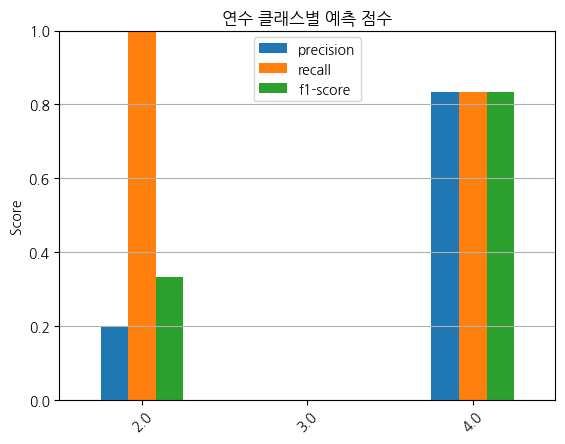

In [ ]:
# 혼동행렬 시각화

report_dict = classification_report(real_pi_year, y_prediction_pi_year, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

metrics = ['precision', 'recall', 'f1-score']
report_df = report_df.loc[report_df.index.notnull() & ~report_df.index.str.contains('accuracy|macro|weighted')]

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

report_df[metrics].plot(kind='bar')
plt.title("연수 클래스별 예측 점수")

plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper center')
plt.show()

# 2년의 precision과 3년의 수치가 매우 낮은 것이 확인

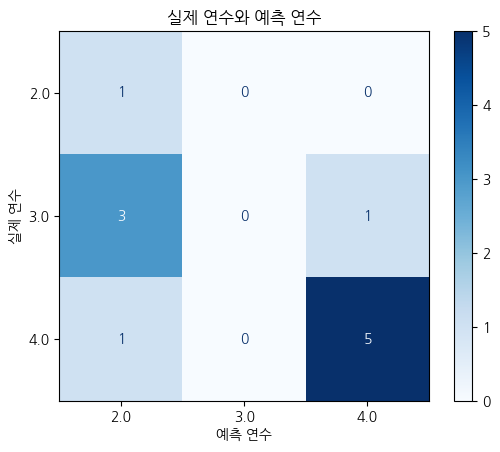

In [ ]:
# 2024-2025 오프시즌은 다른 FA 시장에 비해 이례적일 만큼 3년 계약이 많은 해였음
# 2013~2024 오프시즌 중 투수의 FA 3년 계약은 63건 중 11건이나 지난 오프시즌은 11건 중 4건이 3년 계약
# 오프시즌 시작 전을 기준 시점으로 한 예측 분석이므로 이러한 이례적인 연수 비중 변도를 고려하지 못한 것

ConfusionMatrixDisplay.from_predictions(real_pi_year, y_prediction_pi_year, cmap='Blues', normalize=None)
plt.title('실제 연수와 예측 연수')
plt.ylabel('실제 연수')
plt.xlabel('예측 연수')
plt.show()

In [ ]:
results_df = pd.DataFrame({'선수명' : names_pi_25,
                           '예측 FA 계약 연수' : y_prediction_pi_year.astype('int'),
                           '실제 FA 계약 연수' : real_pi_year.values.astype('int')})

results_df

# 불펜투수들은 소모적으로 투입되는 특성으로 인해 선수생명이 짧아 30대 후반까지 롱런하는 경우가 많지 않음
# 김강률, 노경은, 이용찬 등 1~2년 계약을 맺을 법한 30대 후반 선수들이 3~4년 계약을 획득하면서 모델 예측이 틀어진 것으로 판단

,선수명,예측 FA 계약 연수,실제 FA 계약 연수
0,구승민,2,4
1,김강률,4,4
2,김원중,4,4
3,노경은,2,3
5,엄상백,4,4
6,우규민,2,2
7,이용찬,2,3
8,임기영,4,3
9,임정호,2,3
10,장현식,4,4


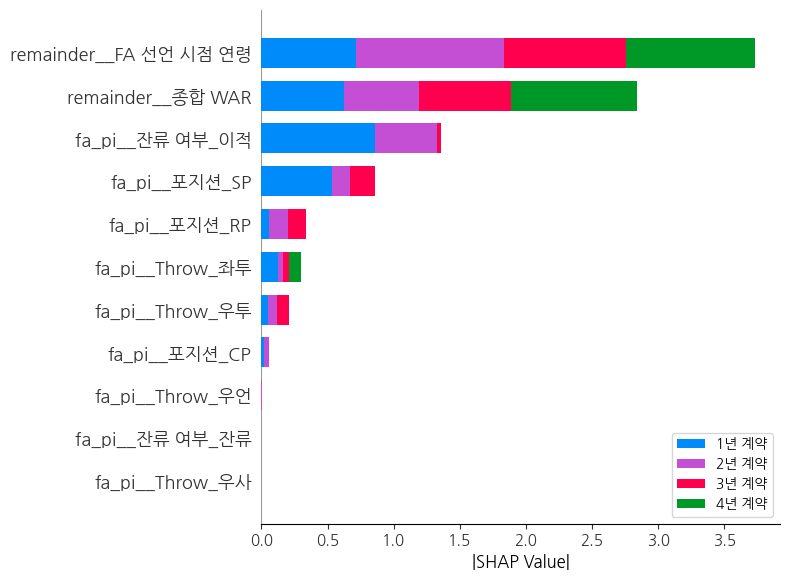

In [ ]:
import shap
import matplotlib.pyplot as plt

# 파이프라인에서 XGBoost 모델 꺼내기
xgbc_model_pi = pipeline_pi_year_xgbc.named_steps['classifier']

# shap explainer 생성
explainer_pi_year = shap.Explainer(xgbc_model_pi)

# 전처리 후의 입력 데이터 얻기
x_val_transformed_pi = pipeline_pi_year_xgbc.named_steps['preprocessing'].transform(x_pi_year_val)

# shap 값 계산
shap_values_pi_year = explainer_pi_year(x_val_transformed_pi)

# 요약 플롯 (plot 객체 저장)
plt.figure()
shap.summary_plot(shap_values_pi_year, x_val_transformed_pi, feature_names=pipeline_pi_year_xgbc.named_steps['preprocessing'].get_feature_names_out(), plot_type='bar', show=False)
plt.xlabel('|SHAP Value|', fontsize=12)

# 현재 axes 객체 얻기
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
new_labels = ['1년 계약', '2년 계약', '3년 계약', '4년 계약']
ax.legend(handles, new_labels, loc='lower right')

plt.tight_layout()
plt.show()

#### 야수도 진행(20250509는 여기서부터 진행해야)

In [ ]:
# 컬럼 구분
features_ba = ['포지션', 'Throw', 'Bat', '잔류 여부']

# 전처리기 정의
preprocessor_ba = ColumnTransformer(transformers=[('fa_ba', OneHotEncoder(handle_unknown='ignore'), features_ba)], remainder='passthrough')

# 분류 모델이 훈련 데이터에 없는 8년 계약을 검증 데이터에 넣어 레이블인코딩이 불가능
# 8년 계약을 인덱스 7로 강제 매핑하도록 수동 인코딩
unique_labels = sorted(y_ba_year_train.unique())
label_map = {v: i for i, v in enumerate(unique_labels)}
reverse_map = {i: v for v, i in label_map.items()}

y_ba_year_train_enc = y_ba_year_train.map(label_map)
y_ba_year_val_enc = y_ba_year_val.map(label_map).fillna(7).astype(int)

pipeline_ba_year_xgbc = Pipeline(steps=[
    ('preprocessing', preprocessor_ba),
    ('classifier', XGBClassifier(n_jobs=-1, random_state=0))
    ])

# 훈련
pipeline_ba_year_xgbc.fit(x_ba_year_train, y_ba_year_train_enc)

# 예측
y_pred_ba_year_enc = pipeline_ba_year_xgbc.predict(x_ba_year_val)
y_pred_ba_year = pd.Series(y_pred_ba_year_enc).map(reverse_map)

# 검증용 데이터로 1차 분류 성능 확인
report_ba_year_val = classification_report(y_ba_year_val, y_pred_ba_year)
print(report_ba_year_val)

# 검증용 데이터에서는 f1이 0.46로 평범한 수준

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.38      0.60      0.46         5
         3.0       0.00      0.00      0.00         5
         4.0       0.73      0.85      0.79        13
         6.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1

    accuracy                           0.52        27
   macro avg       0.18      0.24      0.21        27
weighted avg       0.42      0.52      0.46        27



In [ ]:
# 실제 테스트용 데이터를 예측
y_prediction_ba_year = pipeline_ba_year_xgbc.predict(df_ba_25_year)
y_prediction_ba_year = pd.Series(y_prediction_ba_year).map(reverse_map)

report_ba_year_test = classification_report(real_ba_year, y_prediction_ba_year)
print(report_ba_year_test)

# 테스트 데이터에선 4년 외의 계약을 맞히지 못함

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.75      0.75      0.75         4

    accuracy                           0.38         8
   macro avg       0.19      0.19      0.19         8
weighted avg       0.38      0.38      0.38         8



In [ ]:
# 하이퍼파라미터 튜닝
params = {'classifier__n_estimators' : [100, 200, 300],
          'classifier__max_depth' : [5, 10, 15],
          'classifier__ccp_alpha' : [0.001, 0.005]
          }

grid_search_xgbc_ba = GridSearchCV(pipeline_ba_year_xgbc, param_grid = params, cv=5, scoring='f1_weighted')

unique_labels = sorted(y_ba_year_train.unique())
label_map = {v: i for i, v in enumerate(unique_labels)}
reverse_map = {i: v for v, i in label_map.items()}

y_ba_year_train_enc = y_ba_year_train.map(label_map)
y_ba_year_val_enc = y_ba_year_val.map(label_map).fillna(7).astype(int)

grid_search_xgbc_ba.fit(x_ba_year_train, y_ba_year_train_enc)

grid_search_xgbc_ba.best_estimator_

# n_neighors는 10일 때 최적

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fa_ba',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['포지션', 'Throw', 'Bat',
                                                   '잔류 여부'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               ccp_alpha=0.001, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device=None, early_stoppin...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [ ]:
# 최적 조합으로 분석 재시도
features_ba = ['포지션', 'Throw', 'Bat', '잔류 여부']

preprocessor_ba = ColumnTransformer(transformers=[('fa_ba', OneHotEncoder(handle_unknown='ignore'), features_ba)], remainder='passthrough')

unique_labels = sorted(y_ba_year_train.unique())
label_map = {v: i for i, v in enumerate(unique_labels)}
reverse_map = {i: v for v, i in label_map.items()}

y_ba_year_train_enc = y_ba_year_train.map(label_map)
y_ba_year_val_enc = y_ba_year_val.map(label_map).fillna(7).astype(int)

pipeline_ba_year_xgbc = Pipeline(steps=[
    ('preprocessing', preprocessor_ba),
    ('classifier', XGBClassifier(n_jobs=-1, ccp_alpha=0.001, random_state=0))
    ])

pipeline_ba_year_xgbc.fit(x_ba_year_train, y_ba_year_train_enc)

y_pred_ba_year_enc = pipeline_ba_year_xgbc.predict(x_ba_year_val)
y_pred_ba_year = pd.Series(y_pred_ba_year_enc).map(reverse_map)

report_ba_year_val = classification_report(y_ba_year_val, y_pred_ba_year)
print(report_ba_year_val)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.38      0.60      0.46         5
         3.0       0.00      0.00      0.00         5
         4.0       0.73      0.85      0.79        13
         6.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1

    accuracy                           0.52        27
   macro avg       0.18      0.24      0.21        27
weighted avg       0.42      0.52      0.46        27



In [ ]:
# 실제 테스트용 데이터를 예측
y_prediction_ba_year = pipeline_ba_year_xgbc.predict(df_ba_25_year)
y_prediction_ba_year = pd.Series(y_prediction_ba_year).map(reverse_map)

report_ba_year_test = classification_report(real_ba_year, y_prediction_ba_year)
print(report_ba_year_test)

# 테스트 데이터에서 이번에도 4년 외의 계약을 맞히지 못함

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.75      0.75      0.75         4

    accuracy                           0.38         8
   macro avg       0.19      0.19      0.19         8
weighted avg       0.38      0.38      0.38         8



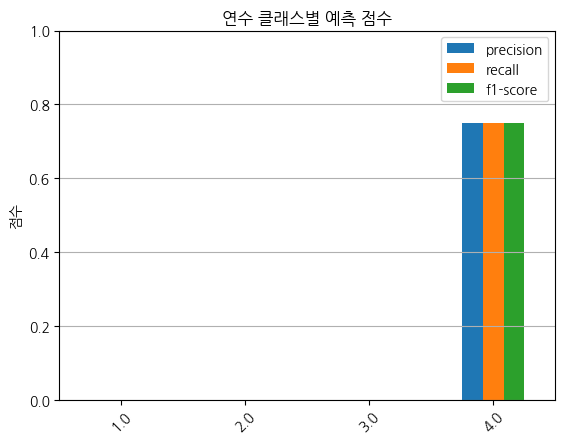

In [ ]:
# 혼동행렬 시각화

report_dict_ba = classification_report(real_ba_year, y_prediction_ba_year, output_dict=True)
report_df_ba = pd.DataFrame(report_dict_ba).transpose()

metrics = ['precision', 'recall', 'f1-score']
report_df_ba = report_df_ba.loc[report_df_ba.index.notnull() & ~report_df_ba.index.str.contains('accuracy|macro|weighted')]

import matplotlib.pyplot as plt
report_df_ba[metrics].plot(kind='bar')
plt.title("연수 클래스별 예측 점수")

plt.ylabel("점수")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

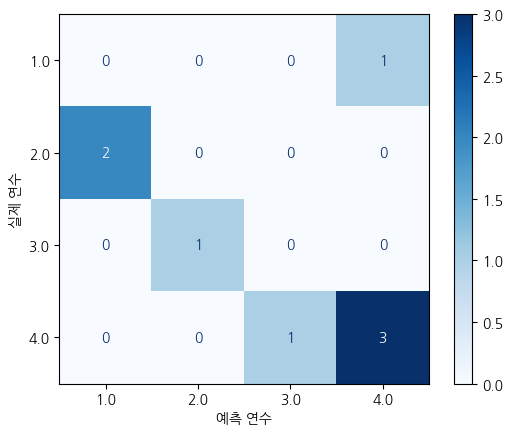

In [ ]:
# 2024-2025 오프시즌은 다른 FA 시장에 비해 이례적일 만큼 1, 3년 계약이 많은 해였음
# 오프시즌 시작 전을 기준 시점으로 한 예측 분석이므로 이러한 이례적인 연수 비중 변도를 고려하지 못한 것

ConfusionMatrixDisplay.from_predictions(real_ba_year, y_prediction_ba_year, cmap='Blues', normalize=None)
plt.title('')
plt.xlabel('예측 연수')
plt.ylabel('실제 연수')
plt.show()

In [ ]:
results_df = pd.DataFrame({'선수명' : names_ba_25,
                           '예측_FA연수' : y_prediction_ba_year.astype('int'),
                           '실제 FA연수' : real_ba_year.values.astype('int')})

results_df

,선수명,예측_FA연수,실제 FA연수
0,김성욱,2,3
1,김헌곤,1,2
2,류지혁,4,4
3,서건창,1,2
4,심우준,4,4
5,최정,3,4
6,하주석,4,1
7,허경민,4,4


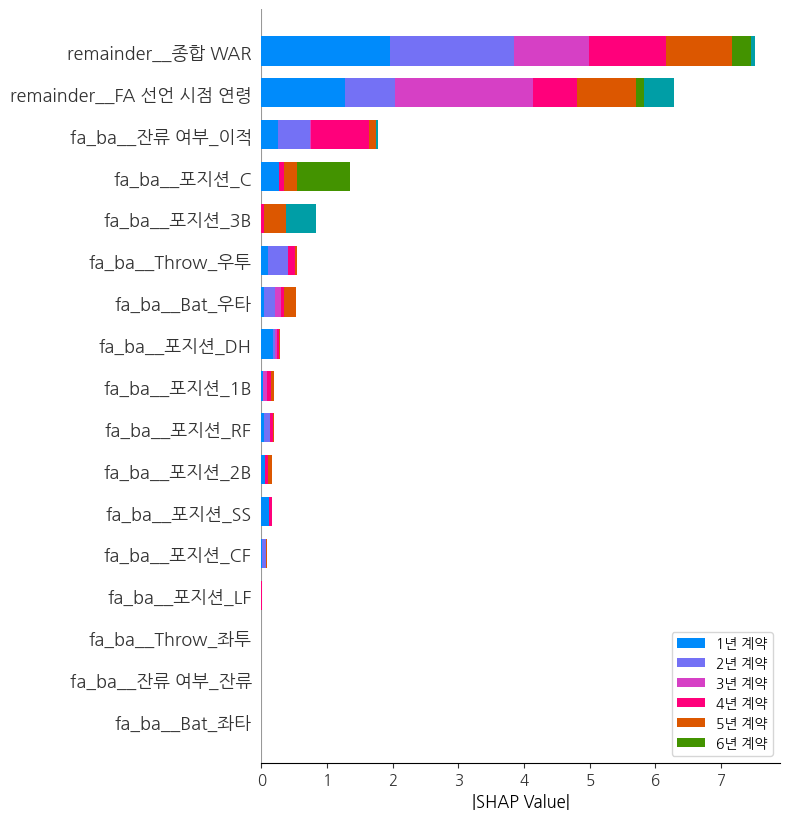

In [ ]:
# shap 차트 구성
xgbc_model_ba = pipeline_ba_year_xgbc.named_steps['classifier']


explainer_ba_year = shap.Explainer(xgbc_model_ba)

x_val_transformed_ba = pipeline_ba_year_xgbc.named_steps['preprocessing'].transform(x_ba_year_val)

shap_values_ba_year = explainer_ba_year(x_val_transformed_ba)

plt.figure()
shap.summary_plot(shap_values_ba_year, x_val_transformed_ba, feature_names=pipeline_ba_year_xgbc.named_steps['preprocessing'].get_feature_names_out(), plot_type='bar', show=False)
plt.xlabel('|SHAP Value|', fontsize=12)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_labels = ['1년 계약', '2년 계약', '3년 계약', '4년 계약', '5년 계약', '6년 계약']
ax.legend(handles, new_labels, loc='lower right')

plt.tight_layout()
plt.show()

**하주석은 fa 직전 시즌에 제일 부진하는 바람에 단년 계약을 맺은 케이스**
- 모델이 4년 계약을 따냈어도 좋았을 선수로 꼽은 하주석은 실제로 올해 공수 양면에서 전반적으로 평균 이상의 지표를 보이고 있음


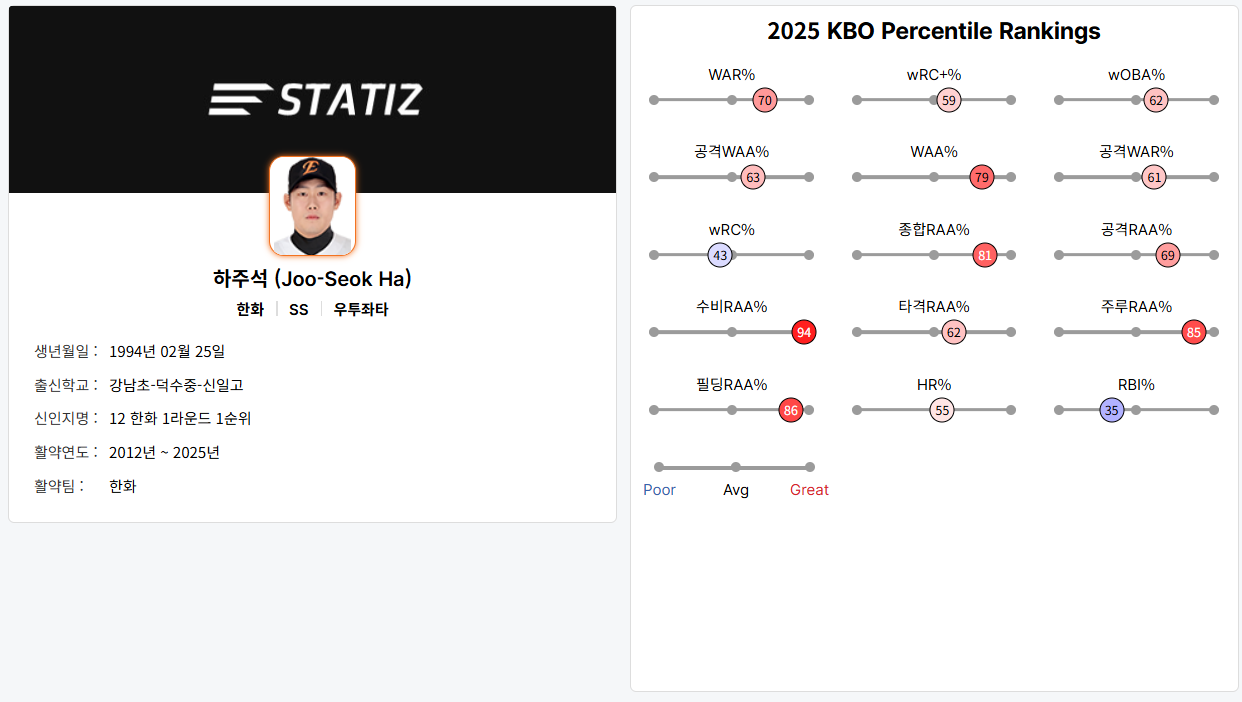

### 회귀 모델 분석 진행

In [ ]:
# 총액 데이터 분할
target_pi_value = df_pi_m3_value.pop('FA 계약 총액')
real_pi_value = df_pi_25_value.pop('FA 계약 총액')

target_ba_value = df_ba_m3_value.pop('FA 계약 총액')
real_ba_value = df_ba_25_value.pop('FA 계약 총액')

from sklearn.model_selection import *

x_pi_value_train, x_pi_value_val, y_pi_value_train, y_pi_value_val = train_test_split(df_pi_m3_value, target_pi_value, test_size=0.2, random_state=0)
x_ba_value_train, x_ba_value_val, y_ba_value_train, y_ba_value_val = train_test_split(df_ba_m3_value, target_ba_value, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import *
from xgboost import XGBRegressor

features_pi = ['포지션', 'Throw', '잔류 여부']

preprocessor_pi = ColumnTransformer(transformers=[('fa_ba', OneHotEncoder(handle_unknown='ignore'), features_pi)], remainder='passthrough')

pipeline_pi_value_xgbr = Pipeline(steps=[
    ('preprocessing', preprocessor_pi),
    ('regressor', XGBRegressor(n_jobs=-1))
    ])

pipeline_pi_value_xgbr.fit(x_pi_value_train, y_pi_value_train)

y_pred_pi_value = pipeline_pi_value_xgbr.predict(x_pi_value_val)


print(f'R^2 : {r2_score(y_pi_value_val, y_pred_pi_value)}')
print(f'RMSE : {root_mean_squared_error(y_pi_value_val, y_pred_pi_value)}')

R^2 : 0.3998276006691537
RMSE : 17.765487696560232


In [ ]:
# 실제 테스트용 데이터를 예측
y_prediction_pi_value = pipeline_pi_value_xgbr.predict(df_pi_25_value)

print(f'R^2 : {r2_score(real_pi_value, y_prediction_pi_value) : .4f}')
print(f'RMSE : {root_mean_squared_error(real_pi_value, y_prediction_pi_value) : .0f}억 원')

# 0.7? 생각보다는 좋다

R^2 :  0.6965
RMSE :  14억 원


In [ ]:
# 하이퍼파라미터 튜닝
params_xgbr = {'regressor__n_estimators' : [100, 200, 300],
          'regressor__max_depth' : [5, 10, 15],
          'regressor__ccp_alpha' : [0.001, 0.005]
          }

grid_search_xgbr_pi_reg = GridSearchCV(pipeline_pi_value_xgbr, param_grid = params_xgbr, cv=5, scoring='f1_weighted')

grid_search_xgbr_pi_reg.fit(x_pi_value_train, y_pi_value_train)


grid_search_xgbr_pi_reg.best_estimator_

# leaf_size, n_neighors가 작을수록 좋은 걸로

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fa_ba',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['포지션', 'Throw', '잔류 여부'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              ccp_alpha=0.001, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=None,
                              device=None, early_stopping_rounds...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [ ]:
# 컬럼 구분
features_pi = ['포지션', 'Throw', '잔류 여부']

# 전처리기 정의
preprocessor_pi = ColumnTransformer(transformers=[('fa_pi', OneHotEncoder(handle_unknown='ignore'), features_pi)], remainder='passthrough')

# 전체 파이프라인
pipeline_pi_value_xgbr = Pipeline(steps=[
    ('preprocessing', preprocessor_pi),
    ('regressor', XGBRegressor(n_estimators=100, ccp_alpha=0.001, max_depth = 5, n_jobs=-1, random_state = 0))
    ])

# 훈련
pipeline_pi_value_xgbr.fit(x_pi_value_train, y_pi_value_train)

# 예측
y_pred_pi_val = pipeline_pi_value_xgbr.predict(x_pi_value_val)

print(f'R^2 : {r2_score(y_pi_value_val, y_pred_pi_val)}')
print(f'RMSE : {root_mean_squared_error(y_pi_value_val, y_pred_pi_val)}')

# ...??

R^2 : 0.27249328585666754
RMSE : 19.55949453905572


In [ ]:
# 실제 테스트용 데이터를 다시 예측
y_prediction_pi_value = pipeline_pi_value_xgbr.predict(df_pi_25_value)

print(f'R^2 : {r2_score(real_pi_value, y_prediction_pi_value) : .4f}')
print(f'RMSE : {root_mean_squared_error(real_pi_value, y_prediction_pi_value) : .0f}억 원')

# 최적화를 했는데 떨어졌다?
# 최초 조합으로 분석

R^2 :  0.6547
RMSE :  15억 원


In [ ]:
results_df = pd.DataFrame({'선수명' : names_pi_25,
                           '예측 FA 연수' : y_prediction_pi_year.astype('int'),
                           '예측 FA 금액' : y_prediction_pi_value,
                           '실제 FA 연수' : real_pi_year.values.astype('int'),
                           '실제 FA 금액' : real_pi_value.values,
                           })

results_df

# 김강률, 엄상백, 우규민, 이용찬, 최원태 계약에서 놀라운 수준의 적중률
# 김원중, 노경은, 임기영 계약에서 오차가 크게 났음

,선수명,예측 FA 연수,예측 FA 금액,실제 FA 연수,실제 FA 금액
0,구승민,2,7.079575,4,21.0
1,김강률,4,14.312550,4,14.0
2,김원중,4,34.925697,4,54.0
3,노경은,2,6.286062,3,25.0
5,엄상백,4,89.189331,4,78.0
6,우규민,2,6.052022,2,7.0
7,이용찬,2,11.014047,3,10.0
8,임기영,4,31.030241,3,15.0
9,임정호,2,6.955550,3,12.0
10,장현식,4,25.074675,4,52.0


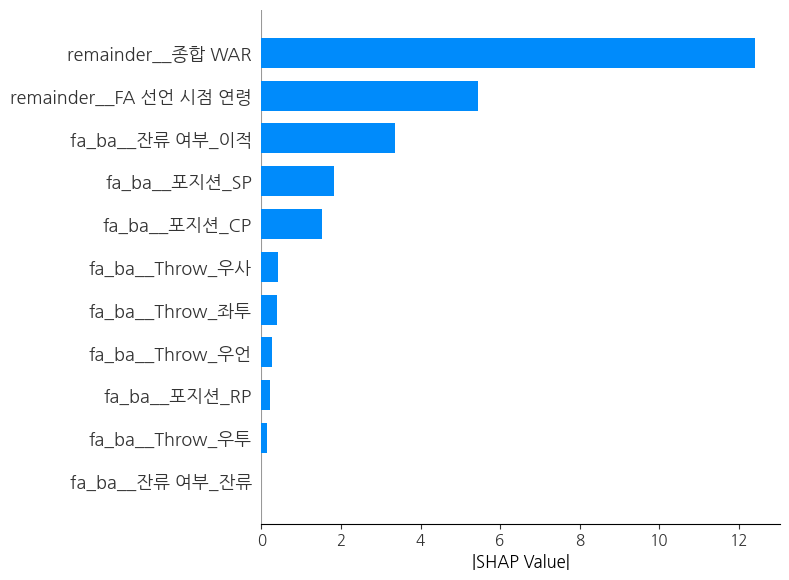

In [ ]:
# shap 차트 구성
import shap

xgb_model_pi = pipeline_pi_value_xgbr.named_steps['regressor']

explainer_pi = shap.Explainer(xgb_model_pi)

x_val_transformed_pi = pipeline_pi_value_xgbr.named_steps['preprocessing'].transform(x_pi_value_val)

shap_values_pi = explainer_pi(x_val_transformed_pi)

shap.summary_plot(shap_values_pi, x_val_transformed_pi, feature_names=pipeline_pi_value_xgbr.named_steps['preprocessing'].get_feature_names_out(), plot_type='bar', show=False)
plt.xlabel('|SHAP Value|', fontsize=12)
plt.tight_layout()
plt.show()

#### 야수 회귀

In [ ]:
features_ba = ['포지션', 'Throw', 'Bat', '잔류 여부']

preprocessor_ba = ColumnTransformer(transformers=[('fa_ba', OneHotEncoder(handle_unknown='ignore'), features_ba)], remainder='passthrough')

pipeline_ba_value_xgbr = Pipeline(steps=[
    ('preprocessing', preprocessor_ba),
    ('regressor', XGBRegressor(n_jobs=-1, random_state=0))
    ])

pipeline_ba_value_xgbr.fit(x_ba_value_train, y_ba_value_train)

y_pred_ba_value = pipeline_ba_value_xgbr.predict(x_ba_value_val)

print(f'R^2 : {r2_score(y_ba_value_val, y_pred_ba_value)}')
print(f'RMSE : {root_mean_squared_error(y_ba_value_val, y_pred_ba_value)}')

R^2 : 0.22696488315289343
RMSE : 29.204790288931928


In [ ]:
# 실제 테스트용 데이터를 예측
y_prediction_ba_value = pipeline_ba_value_xgbr.predict(df_ba_25_value)

print(f'R^2 : {r2_score(real_ba_value, y_prediction_ba_value) : .4f}')
print(f'RMSE : {root_mean_squared_error(real_ba_value, y_prediction_ba_value) : .0f}억 원')

# 투수는 잘 맞혔는데 야수에선 총액 정확도가 조금 아쉽다

R^2 :  0.4882
RMSE :  24억 원


In [ ]:
# 하이퍼파라미터 튜닝
params_xgbr_ba = {'regressor__n_estimators' : [100, 200, 300],
          'regressor__max_depth' : [5, 10, 15],
          'regressor__ccp_alpha' : [0.001, 0.005]
          }

grid_search_xgbr_ba_reg = GridSearchCV(pipeline_ba_value_xgbr, param_grid = params_xgbr_ba, cv=5, scoring='f1_weighted')

grid_search_xgbr_ba_reg.fit(x_ba_value_train, y_ba_value_train)


grid_search_xgbr_ba_reg.best_estimator_

# ccp_alpha=0.001, n_estimators=100, max_depth=5로 선택

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fa_ba',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['포지션', 'Throw', 'Bat',
                                                   '잔류 여부'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              ccp_alpha=0.001, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=None,
                              device=None, early_stopping_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [ ]:
# 최적화한 변수 값으로 재도전
# 컬럼 구분
features_ba = ['포지션', 'Throw', 'Bat', '잔류 여부']

# 전처리기 정의
preprocessor_ba = ColumnTransformer(transformers=[('fa_ba', OneHotEncoder(handle_unknown='ignore'), features_ba)], remainder='passthrough')

# 전체 파이프라인
pipeline_ba_value_xgbr = Pipeline(steps=[
    ('preprocessing', preprocessor_ba),
    ('regressor', XGBRegressor(n_estimators=100, ccp_alpha=0.001, max_depth=5, n_jobs=-1, random_state=0))
    ])

# 훈련
pipeline_ba_value_xgbr.fit(x_ba_value_train, y_ba_value_train)

# 예측
y_pred_ba_value = pipeline_ba_value_xgbr.predict(x_ba_value_val)

print(f'R^2 : {r2_score(y_ba_value_val, y_pred_ba_value) : .4f}')
print(f'RMSE : {root_mean_squared_error(y_ba_value_val, y_pred_ba_value) : .0f}원')

R^2 :  0.2500
RMSE :  29원


In [ ]:
# 실제 테스트용 데이터를 예측
y_prediction_ba_value = pipeline_ba_value_xgbr.predict(df_ba_25_value)

print(f'R^2 : {r2_score(real_ba_value, y_prediction_ba_value) : .4f}')
print(f'RMSE : {root_mean_squared_error(real_ba_value, y_prediction_ba_value) : .0f}억 원')

# 야수도 상당히 정확성이 시원찮다

R^2 :  0.4789
RMSE :  25억 원


In [ ]:
results_df = pd.DataFrame({'선수명' : names_ba_25,
                           '예측 FA 연수' : y_prediction_ba_year.astype('int'),
                           '예측 FA 총액' : y_prediction_ba_value,
                           '실제 FA 연수' : real_ba_year.values.astype('int'),
                           '실제 FA 총액' : real_ba_value.values,
                           })

results_df

# 고액 계약에서 정확도가 크게 틀어지는 모습
# 하주석은 어떤 모델로도 맞히기 힘든 특이 케이스이니 예외로 삼아도 ok

,선수명,예측 FA 연수,예측 FA 총액,실제 FA 연수,실제 FA 총액
0,김성욱,2,12.568265,3,12.0
1,김헌곤,1,1.944041,2,6.0
2,류지혁,4,18.182312,4,26.0
3,서건창,1,0.792394,2,5.0
4,심우준,4,17.840136,4,50.0
5,최정,3,52.680664,4,110.0
6,하주석,4,17.505270,1,1.1
7,허경민,4,32.477654,4,40.0


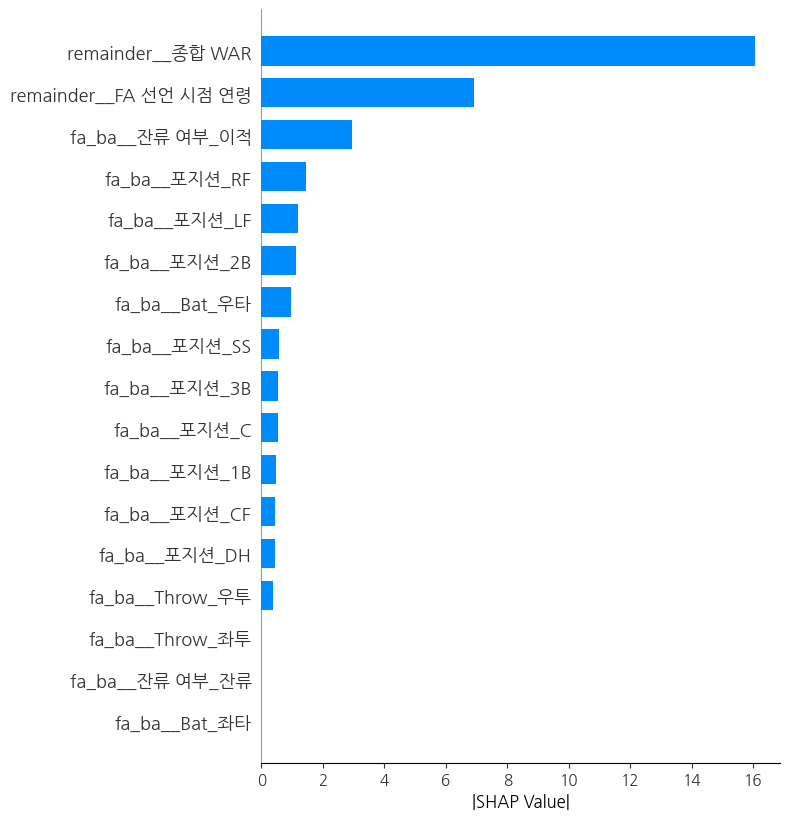

In [ ]:
# shap 차트 구성
import shap

xgb_model_ba = pipeline_ba_value_xgbr.named_steps['regressor']
explainer_ba = shap.Explainer(xgb_model_ba)

x_val_transformed_ba = pipeline_ba_value_xgbr.named_steps['preprocessing'].transform(x_ba_value_val)

shap_values_ba = explainer_ba(x_val_transformed_ba)

shap.summary_plot(shap_values_ba, x_val_transformed_ba, feature_names=pipeline_ba_value_xgbr.named_steps['preprocessing'].get_feature_names_out(), plot_type='bar', show=False)
plt.xlabel('|SHAP Value|', fontsize=12)
plt.tight_layout()
plt.show()

# 요약해보면 성적, 나이, 이적 여부가 야수 모델 예측치에 가장 큰 영향을 미쳤음을 알 수 있음
# 성능이 전반적으로 좋지 못한 것은 독립변수로 취한 변수만으로는 설명이 어렵다는 뜻일 수도 있으나 우선 샘플이 작은 한계일 수도 있으니 크기 영향을 덜 받는 랜덤포레스트로 진행